# Heart Disease Data  Analysis

## Data Set Information:

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

### Aim/Target

For this exercise, our aim is predict the Heart disease presense.

## Data Collection (Loading data into Python)

In [1]:
# Basic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
df = pd.read_csv('cleveland.csv', header=None)

#### Adding given column names to the respective columns in dataset

In [3]:
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [4]:
df.round()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.0,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,2.0,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,3.0,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,4.0,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.0,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.0,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.0,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.0,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [5]:
lst1 = df[df['ca']=='?'].index
lst2 = df[df['thal']=='?'].index

In [6]:
df.drop(lst1, inplace = True)

In [7]:
df.drop(lst2, inplace = True)

## Data Wrangling (Data Cleaning)/(EDA):-

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


We can see here, except target variable (num), remaining all are float64 datatype.

#### Observed some Question marks('?') in our dataset, So First we have to deal with Question marks ('?') for this we consider all question marks as null values.

In [9]:
"""df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['sex'] = pd.to_numeric(df['sex'], errors='coerce')
df['cp'] = pd.to_numeric(df['cp'], errors='coerce')
df['trestbps'] = pd.to_numeric(df['trestbps'], errors='coerce')
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')
df['fbs'] = pd.to_numeric(df['fbs'], errors='coerce')
df['restecg'] = pd.to_numeric(df['restecg'], errors='coerce')
df['thalach'] = pd.to_numeric(df['thalach'], errors='coerce')
df['exang'] = pd.to_numeric(df['exang'], errors='coerce')
df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')
df['slope'] = pd.to_numeric(df['slope'], errors='coerce')
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
df['num'] = pd.to_numeric(df['num'], errors='coerce')"""

"df['age'] = pd.to_numeric(df['age'], errors='coerce')\ndf['sex'] = pd.to_numeric(df['sex'], errors='coerce')\ndf['cp'] = pd.to_numeric(df['cp'], errors='coerce')\ndf['trestbps'] = pd.to_numeric(df['trestbps'], errors='coerce')\ndf['chol'] = pd.to_numeric(df['chol'], errors='coerce')\ndf['fbs'] = pd.to_numeric(df['fbs'], errors='coerce')\ndf['restecg'] = pd.to_numeric(df['restecg'], errors='coerce')\ndf['thalach'] = pd.to_numeric(df['thalach'], errors='coerce')\ndf['exang'] = pd.to_numeric(df['exang'], errors='coerce')\ndf['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')\ndf['slope'] = pd.to_numeric(df['slope'], errors='coerce')\ndf['ca'] = pd.to_numeric(df['ca'], errors='coerce')\ndf['thal'] = pd.to_numeric(df['thal'], errors='coerce')\ndf['num'] = pd.to_numeric(df['num'], errors='coerce')"

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Check and Deal with null values

Finding NULL values

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Here very few null values found in dataset that too in only two columns "ca" and "thal"

To treat these null values, we update these values with mean of the respective column.

In [12]:
#df['ca'].fillna(df['ca'].mean(), inplace=True)
#df['thal'].fillna(df['thal'].mean(), inplace=True)

### Statistical Summary of given data

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Our target column is about hear disease presense or not, in our dataset we have five different values which indicates heart disease is present or not, value 0 indicates no heart disease and values 1 to 4 indicates heart disease presense but in level wise.

In the process of checking our dataset balance, we consider 0 is one parameter and remaining 4 (i.e., 1 to 4) as one perameter

     Presence
No        160
Yes       137


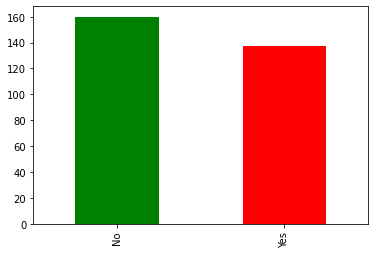

In [14]:
lst =[df.num.value_counts()[0], 
    df.num.value_counts()[1] + df.num.value_counts()[2] + df.num.value_counts()[3] + df.num.value_counts()[4]]
temp_df = pd.DataFrame(lst, index =['No', 'Yes'], columns =  ['Presence'])
print(temp_df)
temp_df.Presence.plot(kind="bar", color=["Green", "Red"])

Here We have 139 person with heart disease and 164 person without heart disease, so our problem is balanced.

### Deviding feature into categorical and Contiues data

In [15]:
categorical_feat = []
continous_feat = []
for column in df.columns:
    print('************************************')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_feat.append(column)
    else:
        continous_feat.append(column)

************************************
age : [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
************************************
sex : [1. 0.]
************************************
cp : [1. 4. 3. 2.]
************************************
trestbps : [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
************************************
chol : [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 

In [16]:
categorical_feat

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']

In [17]:
continous_feat

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Observations in Categorical values

## Data Visualization

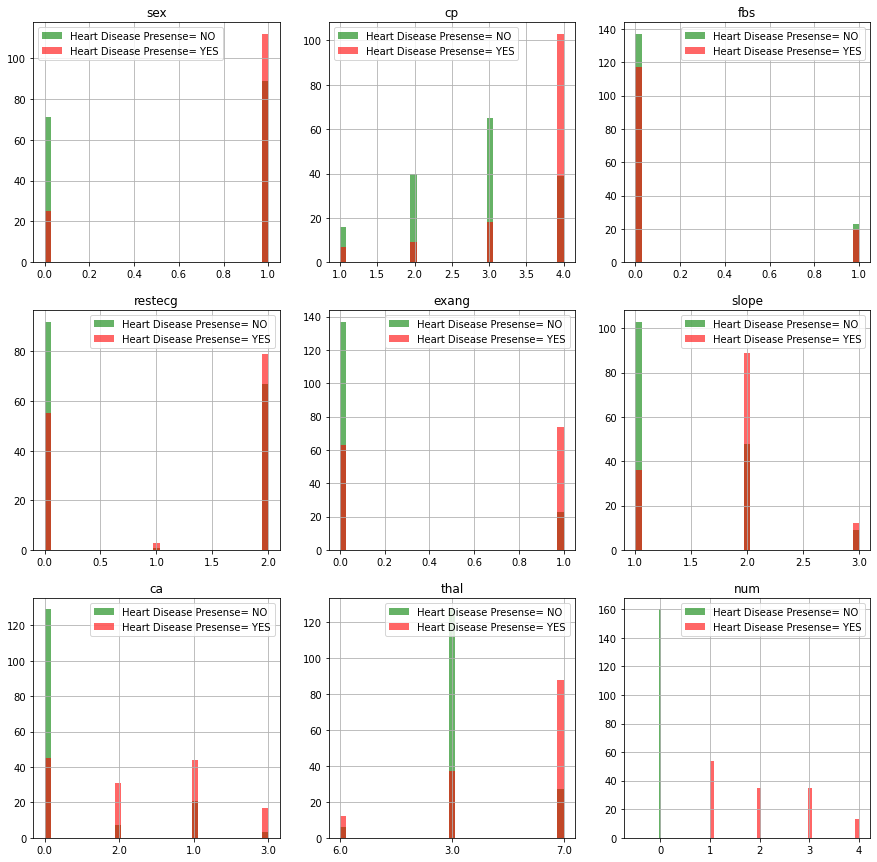

In [18]:
plt.figure(figsize=(15, 15))


#str = str(mar)
for i, column in enumerate(categorical_feat, 1):
    col = column
    plt.subplot(3, 3, i)
    df[df["num"] == 0][column].hist(bins=35, color='green', label='Heart Disease Presense= NO', alpha=0.6)
    df[df["num"] !=0][column].hist(bins=35, color='red', label='Heart Disease Presense= YES', alpha=0.6)
    plt.legend()
    plt.title(col)

cp {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.

restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.

exang {exercise induced angina} : People with value 0 (No) have heart disease more than people with value 1 (Yes ==> exercice induced angina)

slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).


ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.

thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

### Observations in Continues values

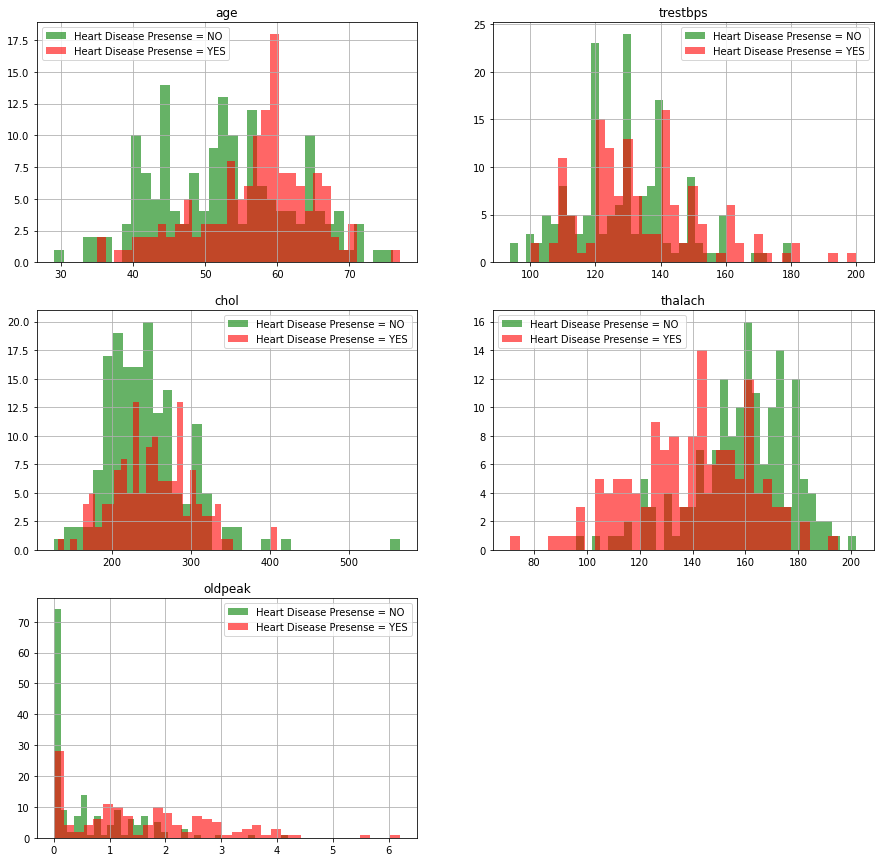

In [19]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_feat, 1):
    col =column
    plt.subplot(3, 2, i)
    df[df["num"] == 0][column].hist(bins=35, color='green', label='Heart Disease Presense = NO', alpha=0.6)
    df[df["num"] != 0][column].hist(bins=35, color='red', label='Heart Disease Presense = YES', alpha=0.6)
    plt.legend()
    plt.title(col)

trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

chol {serum cholestoral in mg/dl} : above 200 is cause for concern.

thalach {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.

oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

## Correlation

(12.5, -0.5)

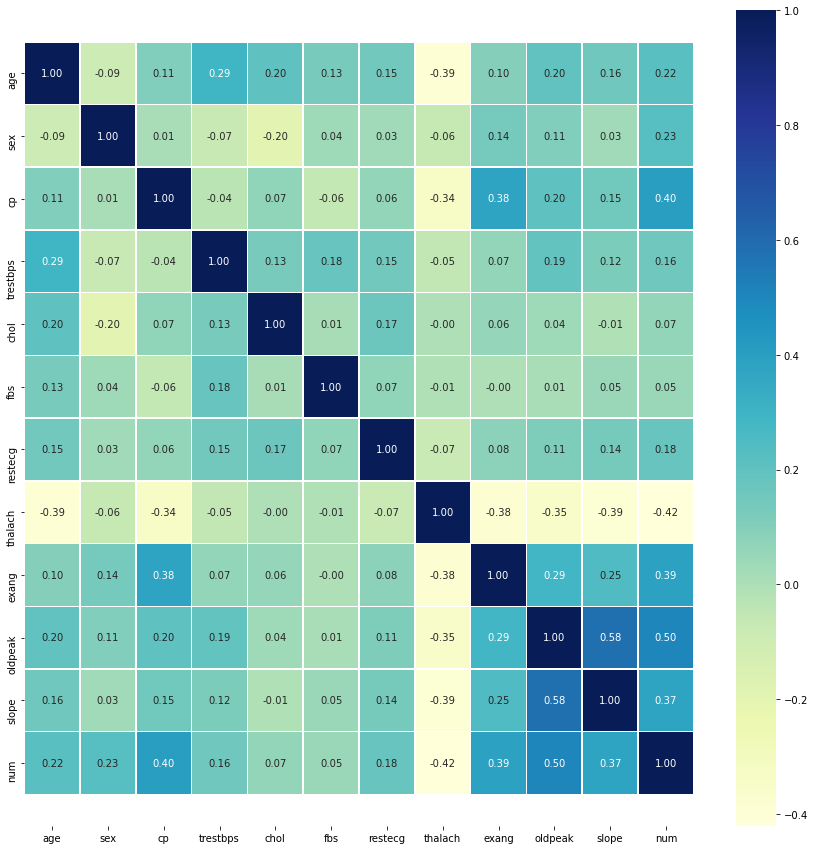

In [20]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

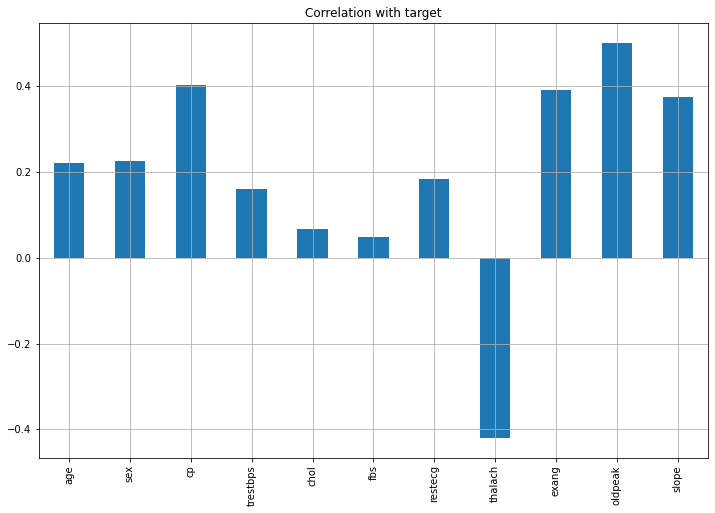

In [21]:
df.drop('num', axis=1).corrwith(df.num).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

fbs and chol are the lowest correlated with the target variable.

All other variables have a significant correlation with the target variable.

## Data Processing

### Feature Scaling

remove target variable from list of categorical features for scaling purpose

In [22]:
categorical_feat.remove('num')

In [23]:
categorical_feat

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [24]:
dum_df= pd.get_dummies(df, columns = categorical_feat)

In [25]:
dum_df.head()

,age,trestbps,chol,thalach,oldpeak,num,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,2,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [26]:
print(df.columns)
print(dum_df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num', 'sex_0.0',
       'sex_1.0', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_0.0', 'fbs_1.0',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_0.0', 'exang_1.0',
       'slope_1.0', 'slope_2.0', 'slope_3.0', 'ca_0.0', 'ca_1.0', 'ca_2.0',
       'ca_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')


In [27]:
s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dum_df[col_to_scale] = s_sc.fit_transform(dum_df[col_to_scale])

In [28]:
dum_df.head()

,age,trestbps,chol,thalach,oldpeak,num,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,2,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


## Model Selection

In [29]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Data Split into two parts one (x) is train data and another (y) is test data

In [30]:
X = dum_df.drop('num', axis=1)
y = dum_df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [31]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 71.50%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1          2       3          4  accuracy  \
precision    0.798507   0.480000   0.555556   0.625   0.666667  0.714976   
recall       0.963964   0.324324   0.400000   0.625   0.400000  0.714976   
f1-score     0.873469   0.387097   0.465116   0.625   0.500000  0.714976   
support    111.000000  37.000000  25.000000  24.000  10.000000  0.714976   

            macro avg  weighted avg  
precision    0.625146      0.685748  
recall       0.542658      0.714976  
f1-score     0.570136      0.690365  
support    207.000000    207.000000  
_______________________________________________
Confusion Matrix: 
 [[107   3   1   0   0]
 [ 20  12   2   3   0]
 [  3   6  10   4   2]
 [  3   3   3  15   0]
 [  1   1   2   2   4]]

Test Result:
Accuracy Score: 57.78%
_______________________________________________
CLASSIFICATION REPORT:
                   0         

In [32]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,71.497585,57.777778


### K-nearest neighbors

In [33]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 66.18%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1     2          3          4  accuracy  \
precision    0.764706   0.424242   0.4   0.700000   0.666667  0.661836   
recall       0.936937   0.378378   0.4   0.291667   0.200000  0.661836   
f1-score     0.842105   0.400000   0.4   0.411765   0.307692  0.661836   
support    111.000000  37.000000  25.0  24.000000  10.000000  0.661836   

            macro avg  weighted avg  
precision    0.591123      0.647565  
recall       0.441396      0.661836  
f1-score     0.472312      0.633976  
support    207.000000    207.000000  
_______________________________________________
Confusion Matrix: 
 [[104   4   3   0   0]
 [ 21  14   1   1   0]
 [  5   8  10   2   0]
 [  5   5   6   7   1]
 [  1   2   5   0   2]]

Test Result:
Accuracy Score: 61.11%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1        

In [34]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,71.497585,57.777778
1,K-nearest neighbors,66.183575,61.111111


### Support Vector machine

In [35]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 76.81%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1          2          3          4  accuracy  \
precision    0.763889   0.800000   0.692308   0.842105   1.000000  0.768116   
recall       0.990991   0.324324   0.720000   0.666667   0.300000  0.768116   
f1-score     0.862745   0.461538   0.705882   0.744186   0.461538  0.768116   
support    111.000000  37.000000  25.000000  24.000000  10.000000  0.768116   

            macro avg  weighted avg  
precision    0.819660      0.782173  
recall       0.600396      0.768116  
f1-score     0.647178      0.738959  
support    207.000000    207.000000  
_______________________________________________
Confusion Matrix: 
 [[110   1   0   0   0]
 [ 21  12   2   2   0]
 [  6   1  18   0   0]
 [  5   0   3  16   0]
 [  2   1   3   1   3]]

Test Result:
Accuracy Score: 57.78%
_______________________________________________
CLASSIFICATION REPORT:
              

In [36]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,71.497585,57.777778
1,K-nearest neighbors,66.183575,61.111111
2,Support Vector Machine,76.811594,57.777778


### Decision Tree Classifier

In [37]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1     2     3     4  accuracy  macro avg  weighted avg
precision    1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    111.0  37.0  25.0  24.0  10.0       1.0      207.0         207.0
_______________________________________________
Confusion Matrix: 
 [[111   0   0   0   0]
 [  0  37   0   0   0]
 [  0   0  25   0   0]
 [  0   0   0  24   0]
 [  0   0   0   0  10]]

Test Result:
Accuracy Score: 53.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1          2          3         4  accuracy  \
precision   0.860465   0.238095   0.181818   0.333333  0.166667  0.533333   
recall      0.755102   0.294118   0.200000   0.272727  0.333333  

In [38]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,71.497585,57.777778
1,K-nearest neighbors,66.183575,61.111111
2,Support Vector Machine,76.811594,57.777778
3,Decision Tree Classifier,100.000000,53.333333


### Random Forest

In [39]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1     2     3     4  accuracy  macro avg  weighted avg
precision    1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    111.0  37.0  25.0  24.0  10.0       1.0      207.0         207.0
_______________________________________________
Confusion Matrix: 
 [[111   0   0   0   0]
 [  0  37   0   0   0]
 [  0   0  25   0   0]
 [  0   0   0  24   0]
 [  0   0   0   0  10]]

Test Result:
Accuracy Score: 57.78%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1     2     3    4  accuracy  macro avg  \
precision   0.746032   0.200000   0.3   0.0  0.0  0.577778   0.249206   
recall      0.959184   0.117647   0.3   0.0  0.0  0.577778   0.275366   


In [40]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,71.497585,57.777778
1,K-nearest neighbors,66.183575,61.111111
2,Support Vector Machine,76.811594,57.777778
3,Decision Tree Classifier,100.000000,53.333333
4,Random Forest Classifier,100.000000,57.777778


### Logistic Regression Hyperparameter Tuning

In [41]:
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.8s


Best parameters: {'C': 0.23357214690901212, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 68.12%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1          2          3     4  accuracy  \
precision    0.750000   0.444444   0.526316   0.571429   0.6  0.681159   
recall       0.972973   0.216216   0.400000   0.500000   0.3  0.681159   
f1-score     0.847059   0.290909   0.454545   0.533333   0.4  0.681159   
support    111.000000  37.000000  25.000000  24.000000  10.0  0.681159   

            macro avg  weighted avg  
precision    0.578438      0.640418  
recall       0.477838      0.681159  
f1-score     0.505169      0.642274  
support    207.000000    207.000000  
_______________________________________________
Confusion Matrix: 
 [[108   2   1   0   0]
 [ 24   8   2   3   0]
 [  6   3  10   4   2]
 [  5   4   3  12   0]
 [  1   1   3   2   3]]

Test Result:
Accuracy Score: 57.78%
___________________________________________

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished


In [42]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,68.115942,57.777778


### K-nearest neighbors Hyperparameter Tuning

In [43]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


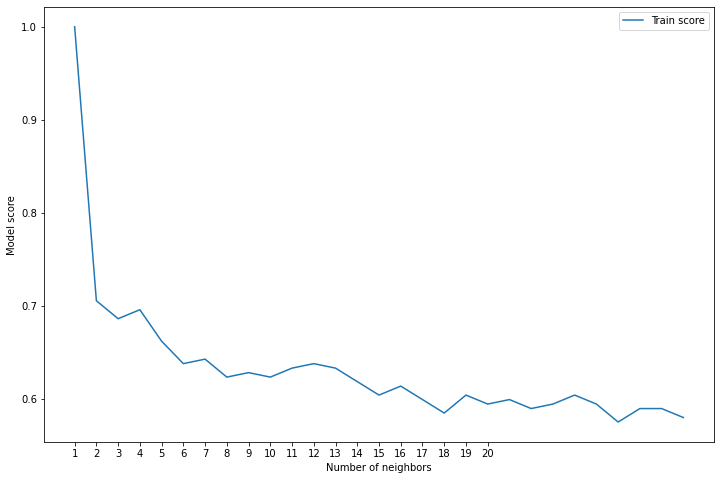

In [44]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [45]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 58.94%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1          2          3     4  accuracy  \
precision    0.679245   0.230769   0.294118   0.600000   0.0  0.589372   
recall       0.972973   0.162162   0.200000   0.125000   0.0  0.589372   
f1-score     0.800000   0.190476   0.238095   0.206897   0.0  0.589372   
support    111.000000  37.000000  25.000000  24.000000  10.0  0.589372   

            macro avg  weighted avg  
precision    0.360826      0.510568  
recall       0.292027      0.589372  
f1-score     0.287094      0.515775  
support    207.000000    207.000000  
_______________________________________________
Confusion Matrix: 
 [[108   3   0   0   0]
 [ 29   6   2   0   0]
 [ 10   8   5   2   0]
 [  9   7   5   3   0]
 [  3   2   5   0   0]]

Test Result:
Accuracy Score: 60.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1        

In [46]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,68.115942,57.777778
1,Tuned K-nearest neighbors,58.937198,60.000000


### Support Vector Machine Hyperparameter Tuning

In [47]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.1s


Best params: {'C': 2, 'gamma': 0.001, 'kernel': 'linear'}
Train Result:
Accuracy Score: 75.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1          2          3          4  accuracy  \
precision    0.818182   0.520000   0.684211   0.681818   0.888889  0.758454   
recall       0.972973   0.351351   0.520000   0.625000   0.800000  0.758454   
f1-score     0.888889   0.419355   0.590909   0.652174   0.842105  0.758454   
support    111.000000  37.000000  25.000000  24.000000  10.000000  0.758454   

            macro avg  weighted avg  
precision    0.718620      0.736309  
recall       0.653865      0.758454  
f1-score     0.678686      0.739269  
support    207.000000    207.000000  
_______________________________________________
Confusion Matrix: 
 [[108   2   1   0   0]
 [ 20  13   1   3   0]
 [  2   5  13   4   1]
 [  2   3   4  15   0]
 [  0   2   0   0   8]]

Test Result:
Accuracy Score: 54.44%
___________________________

[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed:    5.2s finished


In [48]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,68.115942,57.777778
1,Tuned K-nearest neighbors,58.937198,60.000000
2,Tuned Support Vector Machine,75.845411,54.444444


### Decision Tree Classifier Hyperparameter Tuning

In [50]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 6680 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 12280 tasks      | elapsed:   54.7s


Best_params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 17, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 59.90%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1          2     3     4  accuracy   macro avg  \
precision    0.713333   0.0   0.298246   0.0   0.0  0.599034    0.202316   
recall       0.963964   0.0   0.680000   0.0   0.0  0.599034    0.328793   
f1-score     0.819923   0.0   0.414634   0.0   0.0  0.599034    0.246912   
support    111.000000  37.0  25.000000  24.0  10.0  0.599034  207.000000   

           weighted avg  
precision      0.418532  
recall         0.599034  
f1-score       0.489746  
support      207.000000  
_______________________________________________
Confusion Matrix: 
 [[107   0   4   0   0]
 [ 23   0  14   0   0]
 [  8   0  17   0   0]
 [ 10   0  14   0   0]
 [  2   0   8   0   0]]

Test Result:
Accuracy Score: 57.78%
_______________________________________

[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   57.5s finished


In [51]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,68.115942,57.777778
1,Tuned K-nearest neighbors,58.937198,60.000000
2,Tuned Support Vector Machine,75.845411,54.444444
3,Tuned Decision Tree Classifier,59.903382,57.777778


### Random Forest Classifier Hyperparameter Tuning

In [52]:
n_estimators = [10,50,100,150,200,250]
max_features = ['auto', 'sqrt']
#max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
#max_depth.append(None)
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]
#bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               #'max_depth': max_depth, 'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap
              }

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters: {'max_features': 'auto', 'n_estimators': 10}
Train Result:
Accuracy Score: 96.14%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1          2          3          4  accuracy  \
precision    0.965217   0.970588   0.923077   0.956522   1.000000  0.961353   
recall       1.000000   0.891892   0.960000   0.916667   0.900000  0.961353   
f1-score     0.982301   0.929577   0.941176   0.936170   0.947368  0.961353   
support    111.000000  37.000000  25.000000  24.000000  10.000000  0.961353   

            macro avg  weighted avg  
precision    0.963081      0.961760  
recall       0.933712      0.961353  
f1-score     0.947319      0.960874  
support    207.000000    207.000000  
_______________________________________________
Confusion Matrix: 
 [[111   0   0   0   0]
 [  3  33   0   1   0]
 [  1   0  24   0   0]
 [  0   1   1  22   0]
 [  0   0   1   0   9]]

Test Result:
Accuracy Score: 65.56%
_______________________

[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    6.8s finished


In [53]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,68.115942,57.777778
1,Tuned K-nearest neighbors,58.937198,60.000000
2,Tuned Support Vector Machine,75.845411,54.444444
3,Tuned Decision Tree Classifier,59.903382,57.777778
4,Tuned Random Forest Classifier,96.135266,65.555556


In [54]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,71.497585,57.777778
1,K-nearest neighbors,66.183575,61.111111
2,Support Vector Machine,76.811594,57.777778
3,Decision Tree Classifier,100.000000,53.333333
4,Random Forest Classifier,100.000000,57.777778


### Features Importance According to Random Forest

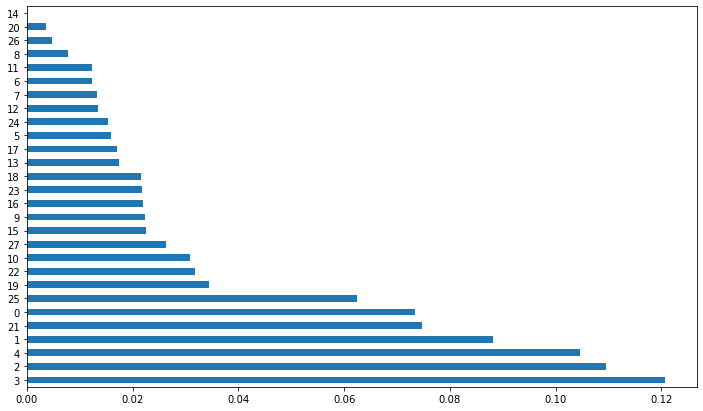

In [55]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False)